# Linear Regression Project: Student Performance Prediction

#### This project  worked with a dataset available on <a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams">Kaggle</a>. The data contains information about students which include the following: 
#### Categorical Features
1. gender: female, male
2. race/ethnicity: group B, group C, group A, group D, group E
3. parental level of education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school
4. lunch: standard, free/reduced
5. test preparation course: none, completed

#### Numeric Features
1. math score
2. reading score 
3. wriring score

### What is the objective of the project?
The goal is to use the available features (gender, race/ethnicity, parental level of education, lunch, test preparation course, writing score, reading score) to predict students math score. 
#### NB: In machine learning, you can use any feature to predict any target, as long as it improves performance and makes statistical and logical sense.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Quick Data Check

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Exploratory Data Analysis

Visualisation showed that 
1. there is linear relationship between the numerical features 
2. there is a high correlation between the writing score and the math score and also between the reading score and the math score

Although using writing score to predict math score might not make sense in real life from a subject-matter perspective, the strong statistical correlation between them can still improve model performance in a machine learning context.

In [59]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

The barplot showed how higher the parental level of education affects the students' math score as parents with **master degree** have students with higher math score and parent with **high school** degree have the students with the least math in the dataset

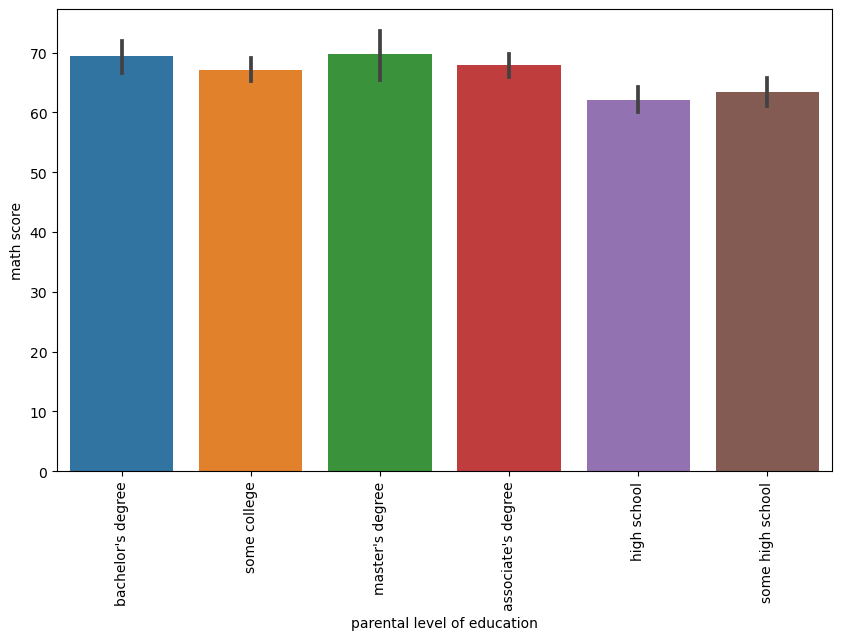

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="parental level of education", y="math score")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

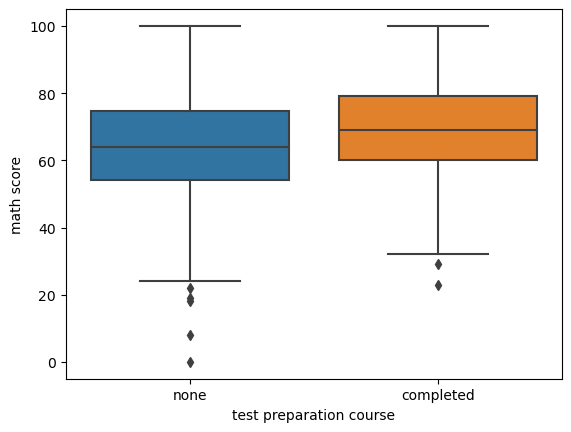

In [69]:
sns.boxplot(x="test preparation course", y="math score", data=df)

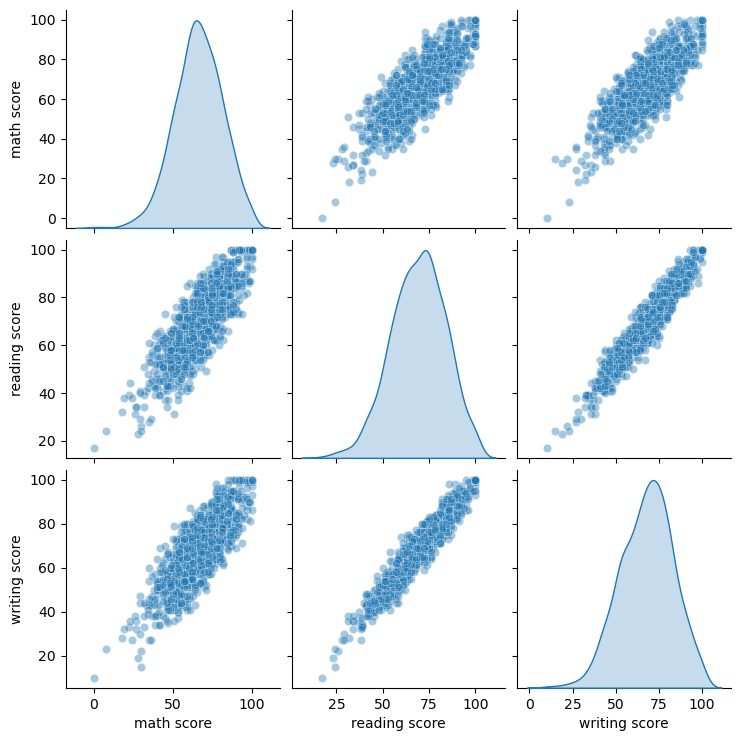

In [4]:
sns.pairplot(data=df, 
             diag_kind='kde',
             plot_kws={'alpha':0.4})

<Figure size 800x300 with 0 Axes>

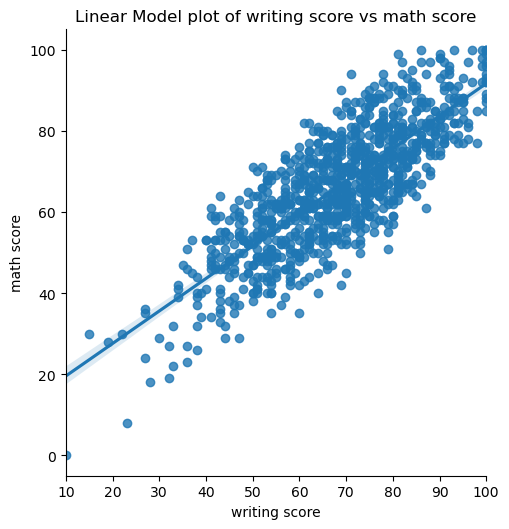

In [48]:
plt.figure(figsize=(8,3))
sns.lmplot(x='writing score', y='math score', data=df)
plt.title("Linear Model plot of writing score vs math score")
plt.show()

<Figure size 800x300 with 0 Axes>

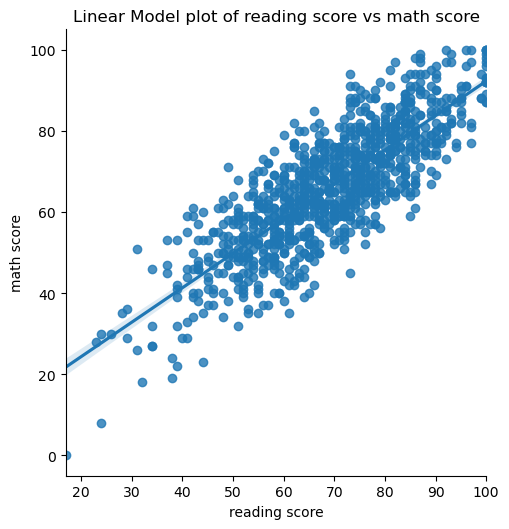

In [46]:
plt.figure(figsize=(8,3))
sns.lmplot(x='reading score', y='math score', data=df)
plt.title("Linear Model plot of reading score vs math score")
plt.show()

Text(0.5, 1.0, 'Correlation between numeric variables/labels')

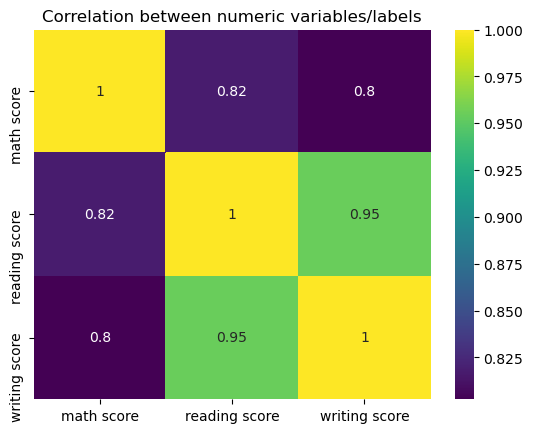

In [8]:
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.title("Correlation between numeric variables")

## Preprocessing 
Encoding categorical features and preparing data for modeling

In [58]:
pd.get_dummies(df, drop_first=True).corr()['math score'].drop('math score')

reading score                                    0.817580
writing score                                    0.802642
gender_male                                      0.167982
race/ethnicity_group B                          -0.084250
race/ethnicity_group C                          -0.073387
race/ethnicity_group D                           0.050071
race/ethnicity_group E                           0.205855
parental level of education_bachelor's degree    0.079664
parental level of education_high school         -0.128725
parental level of education_master's degree      0.060417
parental level of education_some college         0.037056
parental level of education_some high school    -0.079852
lunch_standard                                   0.350877
test preparation course_none                    -0.177702
Name: math score, dtype: float64

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [11]:
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0


In [12]:
X = df_encoded.drop(df_encoded[['math score']], axis=1)

In [13]:
X

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,78,77,0,0,0,1,0,0,0,0,1,0,1,0


In [14]:
y = df_encoded['math score']

In [15]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## Spliting the Data For Training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Algorithm Selection

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()


## Training

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test)

In [24]:
model.coef_

array([ 0.23985294,  0.72310157, 12.98135695, -0.17704969, -0.79299671,
       -0.9478648 ,  4.46909069, -0.60435578,  0.82568446, -1.39628712,
        1.00013219,  0.67098546,  3.4144663 ,  3.06390874])

In [25]:
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficient'])

,Coefficient
reading score,0.239853
writing score,0.723102
gender_male,12.981357
race/ethnicity_group B,-0.177050
race/ethnicity_group C,-0.792997
race/ethnicity_group D,-0.947865
race/ethnicity_group E,4.469091
parental level of education_bachelor's degree,-0.604356
parental level of education_high school,0.825684
parental level of education_master's degree,-1.396287


In [26]:
model.intercept_

-10.541610907538697

In [27]:
predictions

array([ 76.511652  ,  58.89818013,  76.93847803,  76.96588112,
        87.63315155,  78.94668281,  64.60780093,  52.83011773,
        74.28323561,  48.94737113,  53.03440427,  36.20260815,
        67.86648609,  52.27420197,  86.79820118,  70.59883397,
        51.63855945,  46.80113844,  48.61883998,  52.72027293,
        73.89225713,  39.34102125,  57.79189897,  36.36055882,
        78.23627285,  81.63804754,  75.56062537,  46.17327085,
        31.44417895,  49.87212984,  65.58902229,  70.43151729,
        60.32667234,  83.48021561,  84.19623167,  45.82817241,
        76.05073377,  70.13652865,  65.96552567,   3.70880223,
        78.7290069 ,  67.01073937,  68.10392776,  60.49543662,
        79.65561335,  67.5109834 ,  72.06518844,  24.61823419,
        85.9787203 ,  70.49150482,  75.2833751 ,  66.72723882,
        81.4116524 ,  45.6531272 ,  66.11043199,  67.24766513,
        86.09186   ,  58.67846468,  81.91498574,  81.65594974,
        47.45253577,  72.39386125,  70.73746771,  55.70

In [28]:
y_test

521    91
737    53
740    80
660    74
411    84
       ..
468    77
935    70
428    65
7      40
155    70
Name: math score, Length: 300, dtype: int64

In [51]:
residuals = y_test - predictions

Text(0, 0.5, 'Predictions')

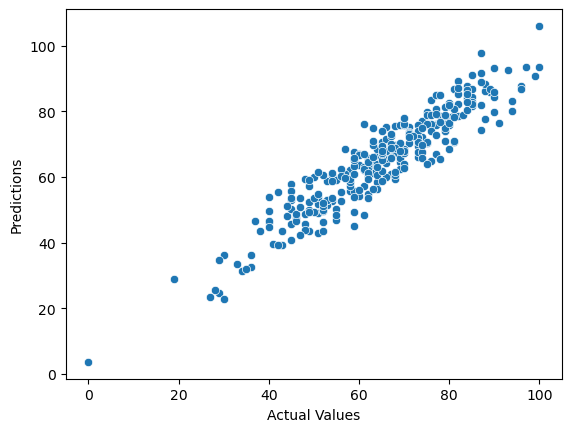

In [55]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

## Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2SCORE = r2_score(y_test, predictions)

In [32]:
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R2SCORE: {R2SCORE}")

Mean Absolute Error: 4.418261320297311
Mean Squared Error: 30.886593188073007
Root Mean Squared Error: 5.557570799195725
R2SCORE: 0.8758630443016737


In [33]:
residuals = y_test-predictions

In [34]:
residuals

521    14.488348
737    -5.898180
740     3.061522
660    -2.965881
411    -3.633152
         ...    
468     4.145234
935     7.393452
428     6.349653
7      -4.841375
155    -8.059841
Name: math score, Length: 300, dtype: float64

Text(0, 0.5, 'Residuals')

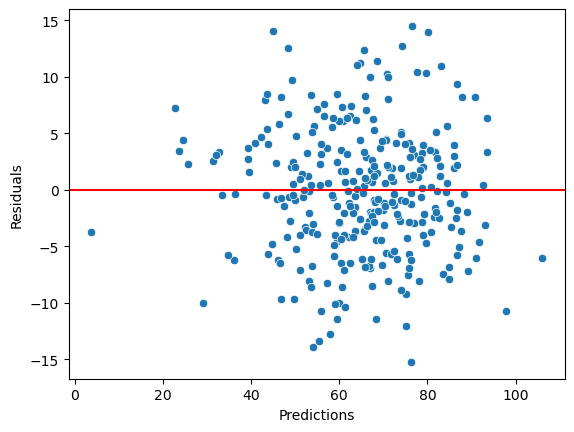

In [35]:
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [36]:
import scipy

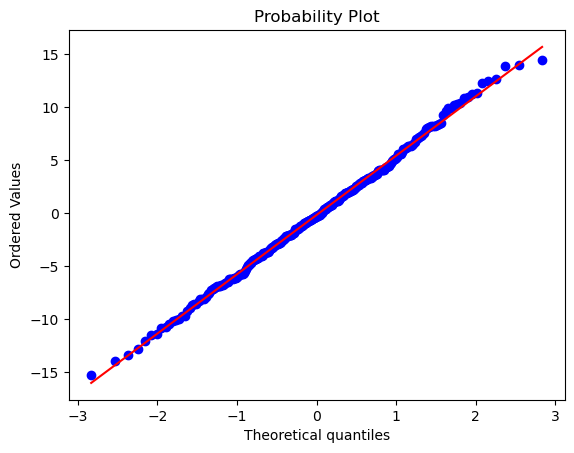

In [37]:
fig,ax = plt.subplots(ncols=1,nrows=1)
_ = scipy.stats.probplot(residuals, plot=ax)

## Saving the model

In [38]:
import joblib

In [39]:
joblib.dump(model,"Student_performance.joblib")

['Student_performance.joblib']

In [40]:
loaded_model = joblib.load("Student_performance.joblib")

In [41]:
loaded_model.intercept_

-10.541610907538697

In [42]:
loaded_model.predict([[77,74,1,0,0,0,0,0,0,1,0,0,1,0]])

C:\Users\Sanni Yusuf\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76.43611764])